tensor([[-0.1198],
        [-0.3814],
        [-0.1436],
        [-0.4723]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])
tensor([[-0.0756],
        [-0.2962],
        [-0.0441],
        [-0.3124]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])
tensor([[-0.0274],
        [-0.2129],
        [ 0.0543],
        [-0.1532]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])
tensor([[ 0.0209],
        [-0.1315],
        [ 0.1524],
        [ 0.0045]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])
tensor([[ 0.0688],
        [-0.0520],
        [ 0.2493],
        [ 0.1601]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])
tensor([[0.1157],
        [0.0254],
        [0.3448],
        [0.3137]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])
tensor([[0.1599],
        [0.0993],
        [0.4388],
        [0.4648]], grad_fn=<SliceBackward0>) tensor([0.2000, 1.4000, 1.8000, 1.6000])


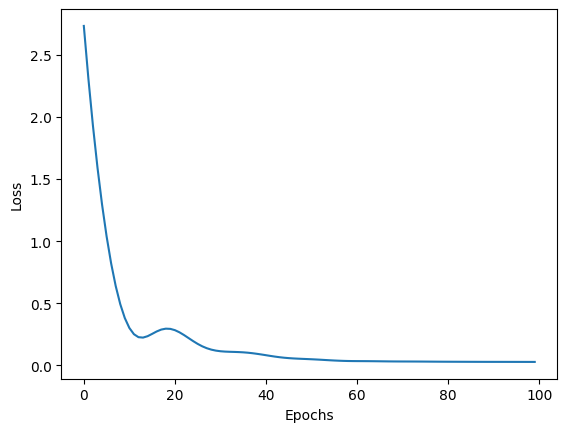

Predictions: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])
Test Accuracy: 0.0
Prediction: tensor([[1.7436],
        [3.8552],
        [4.5802],
        [4.8171],
        [4.0543],
        [4.8320],
        [4.4015],
        [6.1662],
        [4.2080],
        [1.7924],
        [4.4881],
        [4.6630],
        [3.8853],
        [1.8495],
        [1.7398],
        [1.6985],
        [4.8530],
        [4.5709],
        [4.7706],
        [3.0359],
        [4.2900],
        [1.8041],
        [1.9222],
        [1.8076],
        [4.7961],
        [3.7477],
        [4.6274],
        [4.5791],
        [4.0599],
        [4.2727],
        [1.7821],
        [3.3219],
        [4.5532],
        [4.0772],
        [2.1137],
        [1.8008],
        [5.4516],
        [4.7090],
        [4.0634],
        [4.2711],
        [3.7753],
        [5.2322],
        [4.7481],
        [1.9163],
        [1.8768],
        [4.3492],
        [3.8771],
   

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load the Iris dataset from CSV
iris_df = pd.read_csv("iris.csv")

# Map string labels to integers
label_mapping = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
iris_df["variety"] = iris_df["variety"].map(label_mapping)

# Shuffle the dataset
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

# Split features and target
X = iris_df.drop(columns=["variety", "petal.width"]).values
y = iris_df["petal.width"].values

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(X))
X_train_tensor, X_test_tensor = X_tensor[:train_size], X_tensor[train_size:]
y_train_tensor, y_test_tensor = y_tensor[:train_size], y_tensor[train_size:]


# Define the neural network model using PyTorch
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 25)
        self.fc2 = nn.Linear(25, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x


# Instantiate the model
model = SimpleNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    print(outputs[:4], y_train_tensor[:4])
    loss = criterion(outputs.squeeze(), y_train_tensor)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    print("Predictions:", predicted)
    accuracy = (predicted == y_test_tensor).float().mean()
    print("Test Accuracy:", accuracy.item())

    outputs = model(
        torch.tensor(
            iris_df.drop(columns=["petal.width", "variety"]).values,
            dtype=torch.float32,
        )
    )
    _, predicted = torch.max(outputs, 1)
    print("Prediction:", outputs)